<a href="https://colab.research.google.com/github/veyselberk88/Data-Science-Tools-and-Ecosystem/blob/main/lab12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("lab12.ipynb")

<img src="./ccsf.png" alt="CCSF Logo" width=200px style="margin:0px -5px">

# Lab 12: Residuals

## References

* [Sections 15.0 - 15.6 of the Textbook](https://ccsf-math-108.github.io/textbook/chapters/15/Prediction.html)
* [Sections 16.0 - 16.3 of the Textbook](https://ccsf-math-108.github.io/textbook/chapters/16/Inference_for_Regression.html)
* [datascience Documentation](https://datascience.readthedocs.io/)
* [Code Reference](https://ccsf-math-108.github.io/materials-sp25/resources/code-reference.html)

---

## Lab Assignment Reminders

- 🚨 Make sure to run the code cell at the top of this notebook that starts with `# Initialize Otter` to load the auto-grader.
- Your tasks are categorized as auto-graded (📍) and manually graded (📍🔎):
    - **For all auto-graded tasks:**
        - Replace the `...` in the provided code cell with your own code.
        - Run the `grader.check` code cell to execute tests on your code.
        - There are no hidden auto-grader tests in the lab assignments. This means if you pass the tests, you can assume you've completed the task successfully.
    - **For all manually graded tasks:**
        - You may need to provide your own response to the provided prompt. Replace the template text "_Type your answer here, replacing this text._" with your own words.
        - You might need to produce a graphic or another output using code. Replace the `...` in the code cell to generate the image, table, etc.
        - In either case, check your response with a classmate, a tutor, or the instructor before moving on.
- Throughout this assignment and all future ones, please **do not re-assign variables** throughout the notebook! _For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you may fail tests that you thought you were passing previously!_
- You may [submit](#Submit-Your-Assignment-to-Canvas) this assignment as many times as you want before the deadline. Your instructor will score the last version you submit once the deadline has passed.
- **Collaborating on labs is encouraged!** You should rarely remain stuck for more than a few minutes on questions in labs, so ask an instructor or classmate for help. (Explaining things is beneficial, too -- the best way to solidify your knowledge of a subject is to explain it.) However, please don't just share answers.

---

## Configure the Notebook

Run the following cell to configure this Notebook.

In [ ]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

---

## ✈️ San Francisco International Airport Utility Usage

<img src="sfo.webp" width=80% alt="The SFO Internation temrinal">

The San Francisco International Airport (SFO) utilizes a lot of utilities. The data in `sfo_usage.csv` includes the total monthly utility consumption for the electricity (`'electricity'`), natural gas (`'gas'`), and water (`'water'`) utilities. This data was sourced from the [SFO Airport Monthly Utility Consumption for Natural Gas, Water, and Electricity page](https://data.sfgov.org/Energy-and-Environment/SFO-Airport-Monthly-Utility-Consumption-for-Natura/gcjv-3mzf/about_data) on data.sfgov.org. The units for each utility are:

* Electricity: kWh
* Natural Gas: therms
* Water: million gallons

The `'passengers'` column contains the total number of passengers in SFO for the given month.

**Run the following cell to load the data in the table `sfo`.**

In [ ]:
sfo = Table.read_table('sfo.csv')
sfo.show(3)

date,month,month_number,year,electricity,gas,water,passengers
2013-01-01,Jan,1,2013,2.69065e+07,412598,31.0368,3.20936e+06
2013-02-01,Feb,2,2013,2.44482e+07,368066,28.8347,2.96895e+06
2013-03-01,Mar,3,2013,2.76641e+07,363378,28.8376,3.59997e+06


In this lab, you'll create models to predict the usage of electricity from the usage of water and evaluate the model by analyzing the residuals.

---

### Task 01 📍🔎

<!-- BEGIN QUESTION -->

To start, create a scatter plot showing the relationship between electricity and water usage with the least squares regression line overlaid on the scatter plot.

**Note:** Use the `fit_line=True` parameter for the `scatter` method.

_Check your graph with a classmate, a tutor, or the instructor since there are no auto-grader tests for this task._

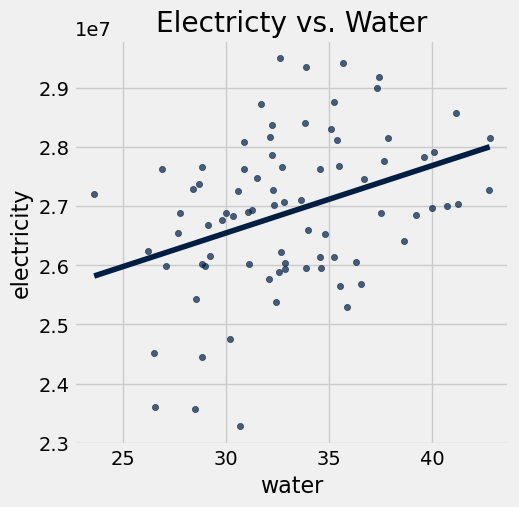

In [ ]:
sfo.scatter('water','electricity',fit_line=True)
plt.title('Electricty vs. Water')
plt.show()

<!-- END QUESTION -->

---

### Task 02 📍

Assign an array of integers to `electricity_water` where the integers correspond to the following statements that best describe the relationship between the gas and water usage based on the scatter plot.

1. There is a positive association between the variables.
2. There is a negative association between the variables.
3. There is neither a positive association nor a negative association between the variables.
4. The association between the variables is approximately linear.
5. The association between the variables is nonlinear.

In [ ]:
electricity_water = make_array(1,5)

In [ ]:
grader.check("task_02")

task_02 results: All test cases passed!
task_02 - 1 message: ✅ gas_water represents an array of integers.
task_02 - 2 message: ✅ Great work. That is how we interpreted this graph as well.

---

## Fitting Models

There is some kind of relationship between the water and electricity usage at SFO. Now, you will fit the best linear model and the best quadratic model to the data. This part of the lab is a continuation of what you were learning last week.

---

### Task 03 📍

A linear model has the form of `linear_predicted_electricity = slope * actual_water + intercept`.

Create the function `linear_model_rmse` that returns the [RMSE](https://inferentialthinking.com/chapters/15/3/Method_of_Least_Squares.html#root-mean-squared-error) for a linear model fit to the electricity and water data in the `sfo` table.

The code provided below the function definition will minimize the RMSE and return the approximate slope and the approximate intercept for the least square regression line.

**Note:** Remember that we are defining error to be the actual $y$ value minus the predicted $y$ value.

In [ ]:
def linear_model_rmse(slope, intercept):
    actual_electricity = sfo.column('electricity')
    actual_water = sfo.column('water')
    linear_predicted_electricity = slope * actual_water + intercept
    error = actual_electricity - linear_predicted_electricity
    return np.sqrt(np.mean(error**2))

# The following code uses the minimize function to determine the optimal
# slope and intercept for the linear model based on your RMSE function.
slope, intercept = minimize(linear_model_rmse)
print(f'The approximate slope and intercept of the least squares linear \
regression line fit to this data are {slope:.3f} kWh/million gallons and {intercept:.3f} kWh.')

The approximate slope and intercept of the least squares linear regression line fit to this data are 113753.566 kWh/million gallons and 23136076.141 kWh.


In [ ]:
grader.check("task_03")

task_03 results: All test cases passed!
task_03 - 1 message: ✅ Your function seems to be working correctly

---

### Task 04 📍

Using the `slope` and `intercept` values calculated in the previous task, create a function called `linear_predict_electricity`. The function should return the predicted electricity usage for the provided water usage.

In [ ]:
def linear_predict_electricity(water_usage):
    return slope * water_usage + intercept

# Apply the function to the data and the predicted values to the table
sfo = sfo.with_column('linear_electricity',
                      sfo.apply(linear_predict_electricity, 'water'))
sfo.show(3)

date,month,month_number,year,electricity,gas,water,passengers,linear_electricity
2013-01-01,Jan,1,2013,2.69065e+07,412598,31.0368,3.20936e+06,2.66666e+07
2013-02-01,Feb,2,2013,2.44482e+07,368066,28.8347,2.96895e+06,2.64161e+07
2013-03-01,Mar,3,2013,2.76641e+07,363378,28.8376,3.59997e+06,2.64165e+07


In [ ]:
grader.check("task_04")

task_04 results: All test cases passed!
task_04 - 1 message: ✅ linear_predict_electricity seems to be working correctly.

---

### Task 05 📍

Next, fit the best quadratic model to the data. (As a reminder, "best" for us in this context means the quadratic model that has the lowest RMSE.) A quadratic model has the form `quadratic_predicted_electricity = a * actual_water ** 2 + b * actual_water + c`.

For this task, we've provided you with the template that mirrors the steps for the linear model. You just need to fill in the details.

In [ ]:
# Function to compute the RMSE for the quadratic model
def quadratic_model_rmse(a, b, c):
    actual_electricity = sfo.column('electricity')
    actual_water = sfo.column('water')

    # Quadratic model prediction: a * water^2 + b * water + c
    quadratic_predicted_electricity = a * actual_water ** 2 + b * actual_water + c

    # Compute the error (actual - predicted) and return the RMSE
    error = actual_electricity - quadratic_predicted_electricity
    return np.sqrt(np.mean(error ** 2))

# Minimize RMSE to get the best values of a, b, and c
a, b, c = minimize(quadratic_model_rmse)

# Function to predict electricity based on water usage for the quadratic model
def quadratic_predict_electricity(water_usage):
    return a * water_usage ** 2 + b * water_usage + c

# Apply the quadratic prediction function to the data and create a new column in the table
sfo = sfo.with_column('quadratic_electricity',
                      sfo.apply(quadratic_predict_electricity, 'water'))

sfo


date,month,month_number,year,electricity,gas,water,passengers,linear_electricity,quadratic_electricity
2013-01-01,Jan,1,2013,2.69065e+07,412598,31.0368,3.20936e+06,2.66666e+07,2.67264e+07
2013-02-01,Feb,2,2013,2.44482e+07,368066,28.8347,2.96895e+06,2.64161e+07,2.63785e+07
2013-03-01,Mar,3,2013,2.76641e+07,363378,28.8376,3.59997e+06,2.64165e+07,2.6379e+07
2013-04-01,Apr,4,2013,2.70255e+07,313840,32.3031,3.60954e+06,2.68107e+07,2.69012e+07
2013-05-01,May,5,2013,2.81716e+07,308500,32.1146,3.9349e+06,2.67892e+07,2.68763e+07
2013-06-01,Jun,6,2013,2.76321e+07,268765,34.5307,4.15515e+06,2.70641e+07,2.71638e+07
2013-07-01,Jul,7,2013,2.87237e+07,279592,31.7107,4.18112e+06,2.67433e+07,2.68217e+07
2013-08-01,Aug,8,2013,2.91834e+07,269948,37.4292,4.3511e+06,2.73938e+07,2.74199e+07
2013-09-01,Sep,9,2013,2.81579e+07,242525,37.8765,3.78548e+06,2.74447e+07,2.74508e+07
2013-10-01,Oct,10,2013,2.83721e+07,309631,32.2261,3.92644e+06,2.68019e+07,2.68911e+07


In [ ]:
grader.check("task_05")

task_05 results: All test cases passed!
task_05 - 1 message: ✅ Great work adding the 'quadratic_electricity' column to sfo.
task_05 - 2 message: ✅ Your quadratic electricity predictions seem to be correct.

---

### Task 06 📍🔎

<!-- BEGIN QUESTION -->

Run the following code cell to see the predicted electricity values overlaid with the actual data.

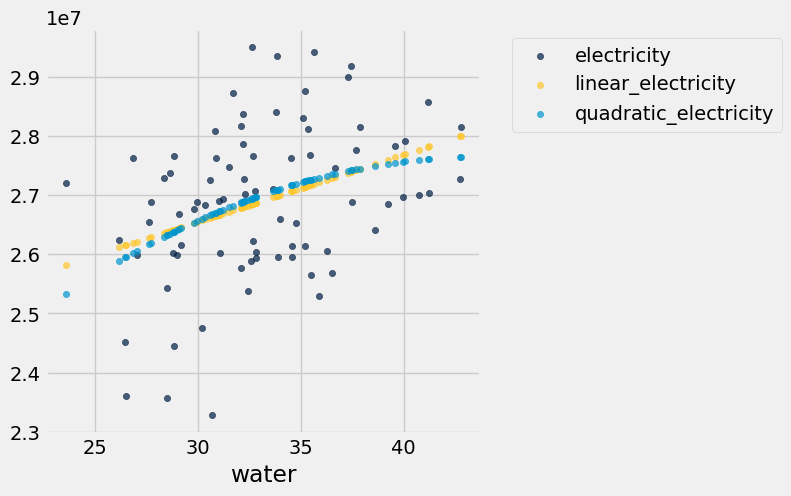

In [ ]:
sfo.select('electricity', 'water', 'linear_electricity', 'quadratic_electricity').scatter('water')

Based on this graphic, do you think the linear or quadratic model fits the general trend of the data?

_Check your response with a classmate, a tutor, or the instructor before moving on since there is no auto-grader for this task._

The quadratic model fits the data better because it captures the curve in the relationship between electricity and water usage, unlike the linear model.

<!-- END QUESTION -->

---

## Model Evaluation

Great work so far! Now we want you to use the tools you've learned in [Chapter 14](https://inferentialthinking.com/chapters/15/Prediction.html) to be able to decide between the two models.

---

### Residuals

We define the residual to be the actual value minus the predicted value. (Yes, this is the same as the term error used above.) Analyzing residuals can be useful to help you decide between two (or more) models for prediction.

---

#### Task 07 📍

Calculate the residuals associated with the linear and quadratic predictions. We created the function below called `residual` that returns the residual associated with the provided actual and predicted values.

We provided code to add those residuals to the table `sfo`.

In [ ]:
def residual(actual, predicted):
    return actual - predicted

In [ ]:
linear_residuals = residual(sfo.column('electricity'), sfo.column('linear_electricity'))
quadratic_residuals = residual(sfo.column('electricity'), sfo.column('quadratic_electricity'))

sfo = sfo.with_columns(
    'linear_residual', linear_residuals,
    'quadratic_residual', quadratic_residuals)
sfo

date,month,month_number,year,electricity,gas,water,passengers,linear_electricity,quadratic_electricity,linear_residual,quadratic_residual
2013-01-01,Jan,1,2013,2.69065e+07,412598,31.0368,3.20936e+06,2.66666e+07,2.67264e+07,239890,180101
2013-02-01,Feb,2,2013,2.44482e+07,368066,28.8347,2.96895e+06,2.64161e+07,2.63785e+07,-1.96794e+06,-1.93033e+06
2013-03-01,Mar,3,2013,2.76641e+07,363378,28.8376,3.59997e+06,2.64165e+07,2.6379e+07,1.24761e+06,1.28505e+06
2013-04-01,Apr,4,2013,2.70255e+07,313840,32.3031,3.60954e+06,2.68107e+07,2.69012e+07,214872,124365
2013-05-01,May,5,2013,2.81716e+07,308500,32.1146,3.9349e+06,2.67892e+07,2.68763e+07,1.38239e+06,1.29529e+06
2013-06-01,Jun,6,2013,2.76321e+07,268765,34.5307,4.15515e+06,2.70641e+07,2.71638e+07,568019,468300
2013-07-01,Jul,7,2013,2.87237e+07,279592,31.7107,4.18112e+06,2.67433e+07,2.68217e+07,1.98041e+06,1.90197e+06
2013-08-01,Aug,8,2013,2.91834e+07,269948,37.4292,4.3511e+06,2.73938e+07,2.74199e+07,1.78959e+06,1.76345e+06
2013-09-01,Sep,9,2013,2.81579e+07,242525,37.8765,3.78548e+06,2.74447e+07,2.74508e+07,713285,707115
2013-10-01,Oct,10,2013,2.83721e+07,309631,32.2261,3.92644e+06,2.68019e+07,2.68911e+07,1.57017e+06,1.481e+06


In [ ]:
grader.check("task_07")

task_07 results: All test cases passed!
task_07 - 1 message: ✅ Your residuals from the linear model seem correct.
task_07 - 2 message: ✅ Your residuals from the quadratic model seem correct.

---

#### Task 08 📍🔎

<!-- BEGIN QUESTION -->

Residual plots can be used to do a visual diagnostic of a model. In short, a residual plot is a scatter plot with the predictor variable (water usage) on the horizontal axis and the associated residuals on the vertical axis.

According to [Section 15.5](https://inferentialthinking.com/chapters/15/5/Visual_Diagnostics.html):

> The residual plot of a good regression shows no pattern. The residuals look about the same, above and below the horizontal line at 0, across the range of the predictor variable.

1. Create two residual plots, one for the linear model and one for the quadratic model.
2. Based on a visual inspection of the two plots and the content of Section 15.5, which model would you choose?

 The quadratic model would be the better fit for this data, as it captures the relationship more accurately.

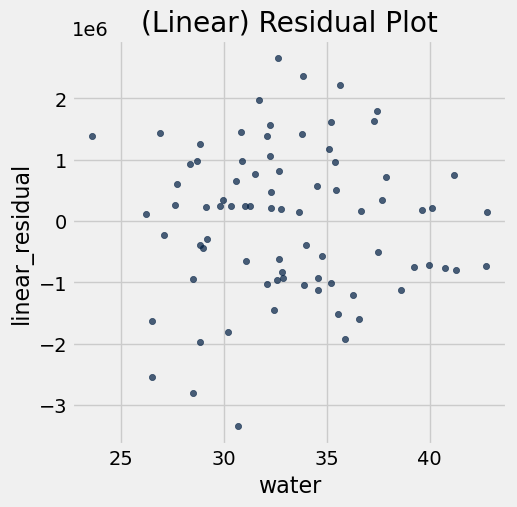

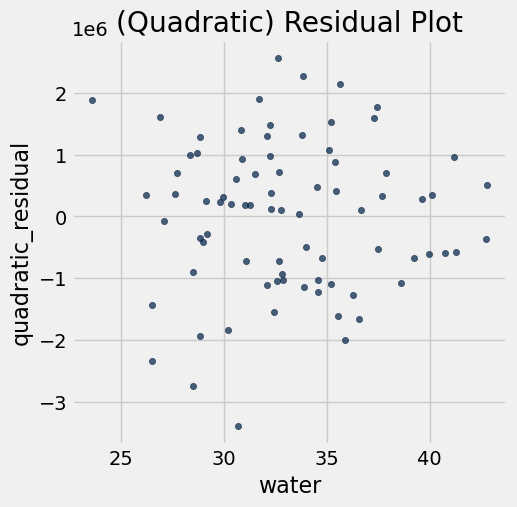

In [ ]:
sfo.scatter('water', 'linear_residual')
plt.title('(Linear) Residual Plot')
plt.show()

sfo.scatter('water', 'quadratic_residual')
plt.title('(Quadratic) Residual Plot')
plt.show()

<!-- END QUESTION -->

---

### RMSE

Root mean squared error (Error) is a way to summarize the prediction error for a model. You can decide between two models by choosing the model with the smaller RMSE.

---

#### Task 09 📍

For this task:
1. Create the function `rmse` that uses the `sfo` table that you've built so far and returns the RMSE associated with the actual electricity values and predicted electricity values based on the model you used. The argument `'predicted_col'` will tell the function which column in `sfo` contains the predicted values you want to use for the calculation.
2. After calculating the RMSE associated with each model, assign 'linear' or 'quadratic' to `best_model_by_RMSE` based on which model has the lowest RMSE.

In [ ]:
def rmse(predicted_col):
    actual = sfo.column('electricity')
    predicted = sfo.column(predicted_col)
    error = actual - predicted
    return np.sqrt(np.mean(error**2))

linear_rmse =  rmse('linear_electricity')
quadratic_rmse = rmse('quadratic_electricity')
print(f'The linear RMSE is {linear_rmse}. \nThe quadratic RMSE is {quadratic_rmse}.')

best_model_by_RMSE = 'linear' if linear_rmse < quadratic_rmse else 'quadratic'
print(f'You said the the {best_model_by_RMSE} model is the best model based on the RMSE value.')

The linear RMSE is 1210610.0712136752. 
The quadratic RMSE is 1206228.635110698.
You said the the quadratic model is the best model based on the RMSE value.


In [ ]:
grader.check("task_09")

task_09 results: All test cases passed!
task_09 - 1 message: ✅ Your linear RMSE seems correct.
task_09 - 2 message: ✅ Your quadratic RMSE seems correct.
task_09 - 3 message: ✅ You choose 'linear' or 'quadratic'.
task_09 - 4 message: ✅ We agree with your model choice!

---

Great work! As you can see, choosing the best model to predict with is not a simple decision. There are many things to consider when picking a model, and the tools you've learned about are here to help you make a decision.

---

## Submit Your Assignment to Canvas

Follow these steps to submit your lab assignment:

1. **Check the Assignment Completion Requirements:** This assignment is scored as Complete or Incomplete. Make sure to check with your instructor about their requirements for a Complete score.
2. **Run the Auto-Grader:** Ensure you have executed the code cell containing the command `grader.check_all()` to run all tests for auto-graded tasks marked with 📍. This command will execute all auto-grader tests sequentially.
3. **Complete Manually Graded Tasks:** Verify that you have responded to all the manually graded tasks marked with 📍🔎.
4. **Save Your Work:** In the notebook's Toolbar, go to `File -> Save Notebook` to save your work and create a checkpoint.
5. **Download the Notebook:** In the notebook's Toolbar, go to `File -> Download HTML` to download the HTML version (`.html`) of this notebook.
6. **Upload to Canvas:** On the Canvas Assignment page, click "Start Assignment" or "New Attempt" to upload the downloaded `.html` file.

---

## Attribution

This content is licensed under the <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License (CC BY-NC-SA 4.0)</a> and derived from the <a href="https://www.data8.org/">Data 8: The Foundations of Data Science</a> offered by the University of California, Berkeley.

<img src="./by-nc-sa.png" width=100px>

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

task_02 results: All test cases passed!
task_02 - 1 message: ✅ gas_water represents an array of integers.
task_02 - 2 message: ✅ Great work. That is how we interpreted this graph as well.

task_03 results: All test cases passed!
task_03 - 1 message: ✅ Your function seems to be working correctly

task_04 results: All test cases passed!
task_04 - 1 message: ✅ linear_predict_electricity seems to be working correctly.

task_05 results: All test cases passed!
task_05 - 1 message: ✅ Great work adding the 'quadratic_electricity' column to sfo.
task_05 - 2 message: ✅ Your quadratic electricity predictions seem to be correct.

task_07 results: All test cases passed!
task_07 - 1 message: ✅ Your residuals from the linear model seem correct.
task_07 - 2 message: ✅ Your residuals from the quadratic model seem correct.

task_09 results: All test cases passed!
task_09 - 1 message: ✅ Your linear RMSE seems correct.
task_09 - 2 message: ✅ Your quadratic RMSE seems correct.
task_09 - 3 message: ✅ You ch